In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

#### Sentiment Distributions

In [2]:
df = pd.read_csv('preprocessed-text.csv', delimiter=',')

In [3]:
df.head(3)

,Unnamed: 0,labels,messages
0,0,0,"['accord', 'gran', 'company', 'no', 'plan', 'move', 'production', 'russia', 'although', 'company..."
1,1,0,"['technopoli', 'plan', 'develop', 'stage', 'area', 'no', 'less', 'square', 'meter', 'order', 'ho..."
2,2,-1,"['international', 'electronic', 'industry', 'company', 'elcoteq', 'lay', 'ten', 'employee', 'tal..."


In [4]:
df['messages'][0].replace("'", "")

'[accord, gran, company, no, plan, move, production, russia, although, company, grow]'

In [5]:
for l in range(len(df['messages'])):
    df['messages'][l] = df['messages'][l].replace("'", "")
    df['messages'][l] = df['messages'][l].replace("[", "")
    df['messages'][l] = df['messages'][l].replace("]", "")

In [6]:
df['lemm_text'] = df['messages']

In [7]:
for l in range(len(df['messages'])):
    df['messages'][l]= df['messages'][l].split(',')

In [8]:
df['messages'][0][0]

'accord'

In [9]:
df['lemm_text'][0][0]

'a'

In [12]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [13]:
df['sentiment']= df['lemm_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [14]:
df.head()

,labels,messages,lemm_text,sentiment
0,0,"[accord, gran, company, no, plan, move, production, russia, although, company, grow]","accord, gran, company, no, plan, move, production, russia, although, company, grow",0.000000
1,0,"[technopoli, plan, develop, stage, area, no, less, square, meter, order, host, compan...","technopoli, plan, develop, stage, area, no, less, square, meter, order, host, company, work, com...",0.083333
2,-1,"[international, electronic, industry, company, elcoteq, lay, ten, employee, tallinn, fa...","international, electronic, industry, company, elcoteq, lay, ten, employee, tallinn, facility, co...",-0.140000
3,1,"[new, production, plant, company, would, increase, capacity, meet, expect, increase, d...","new, production, plant, company, would, increase, capacity, meet, expect, increase, demand, woul...",-0.047203
4,1,"[accord, company, update, strategy, year, basware, target, long, term, net, sale, gro...","accord, company, update, strategy, year, basware, target, long, term, net, sale, growth, range, ...",-0.016667


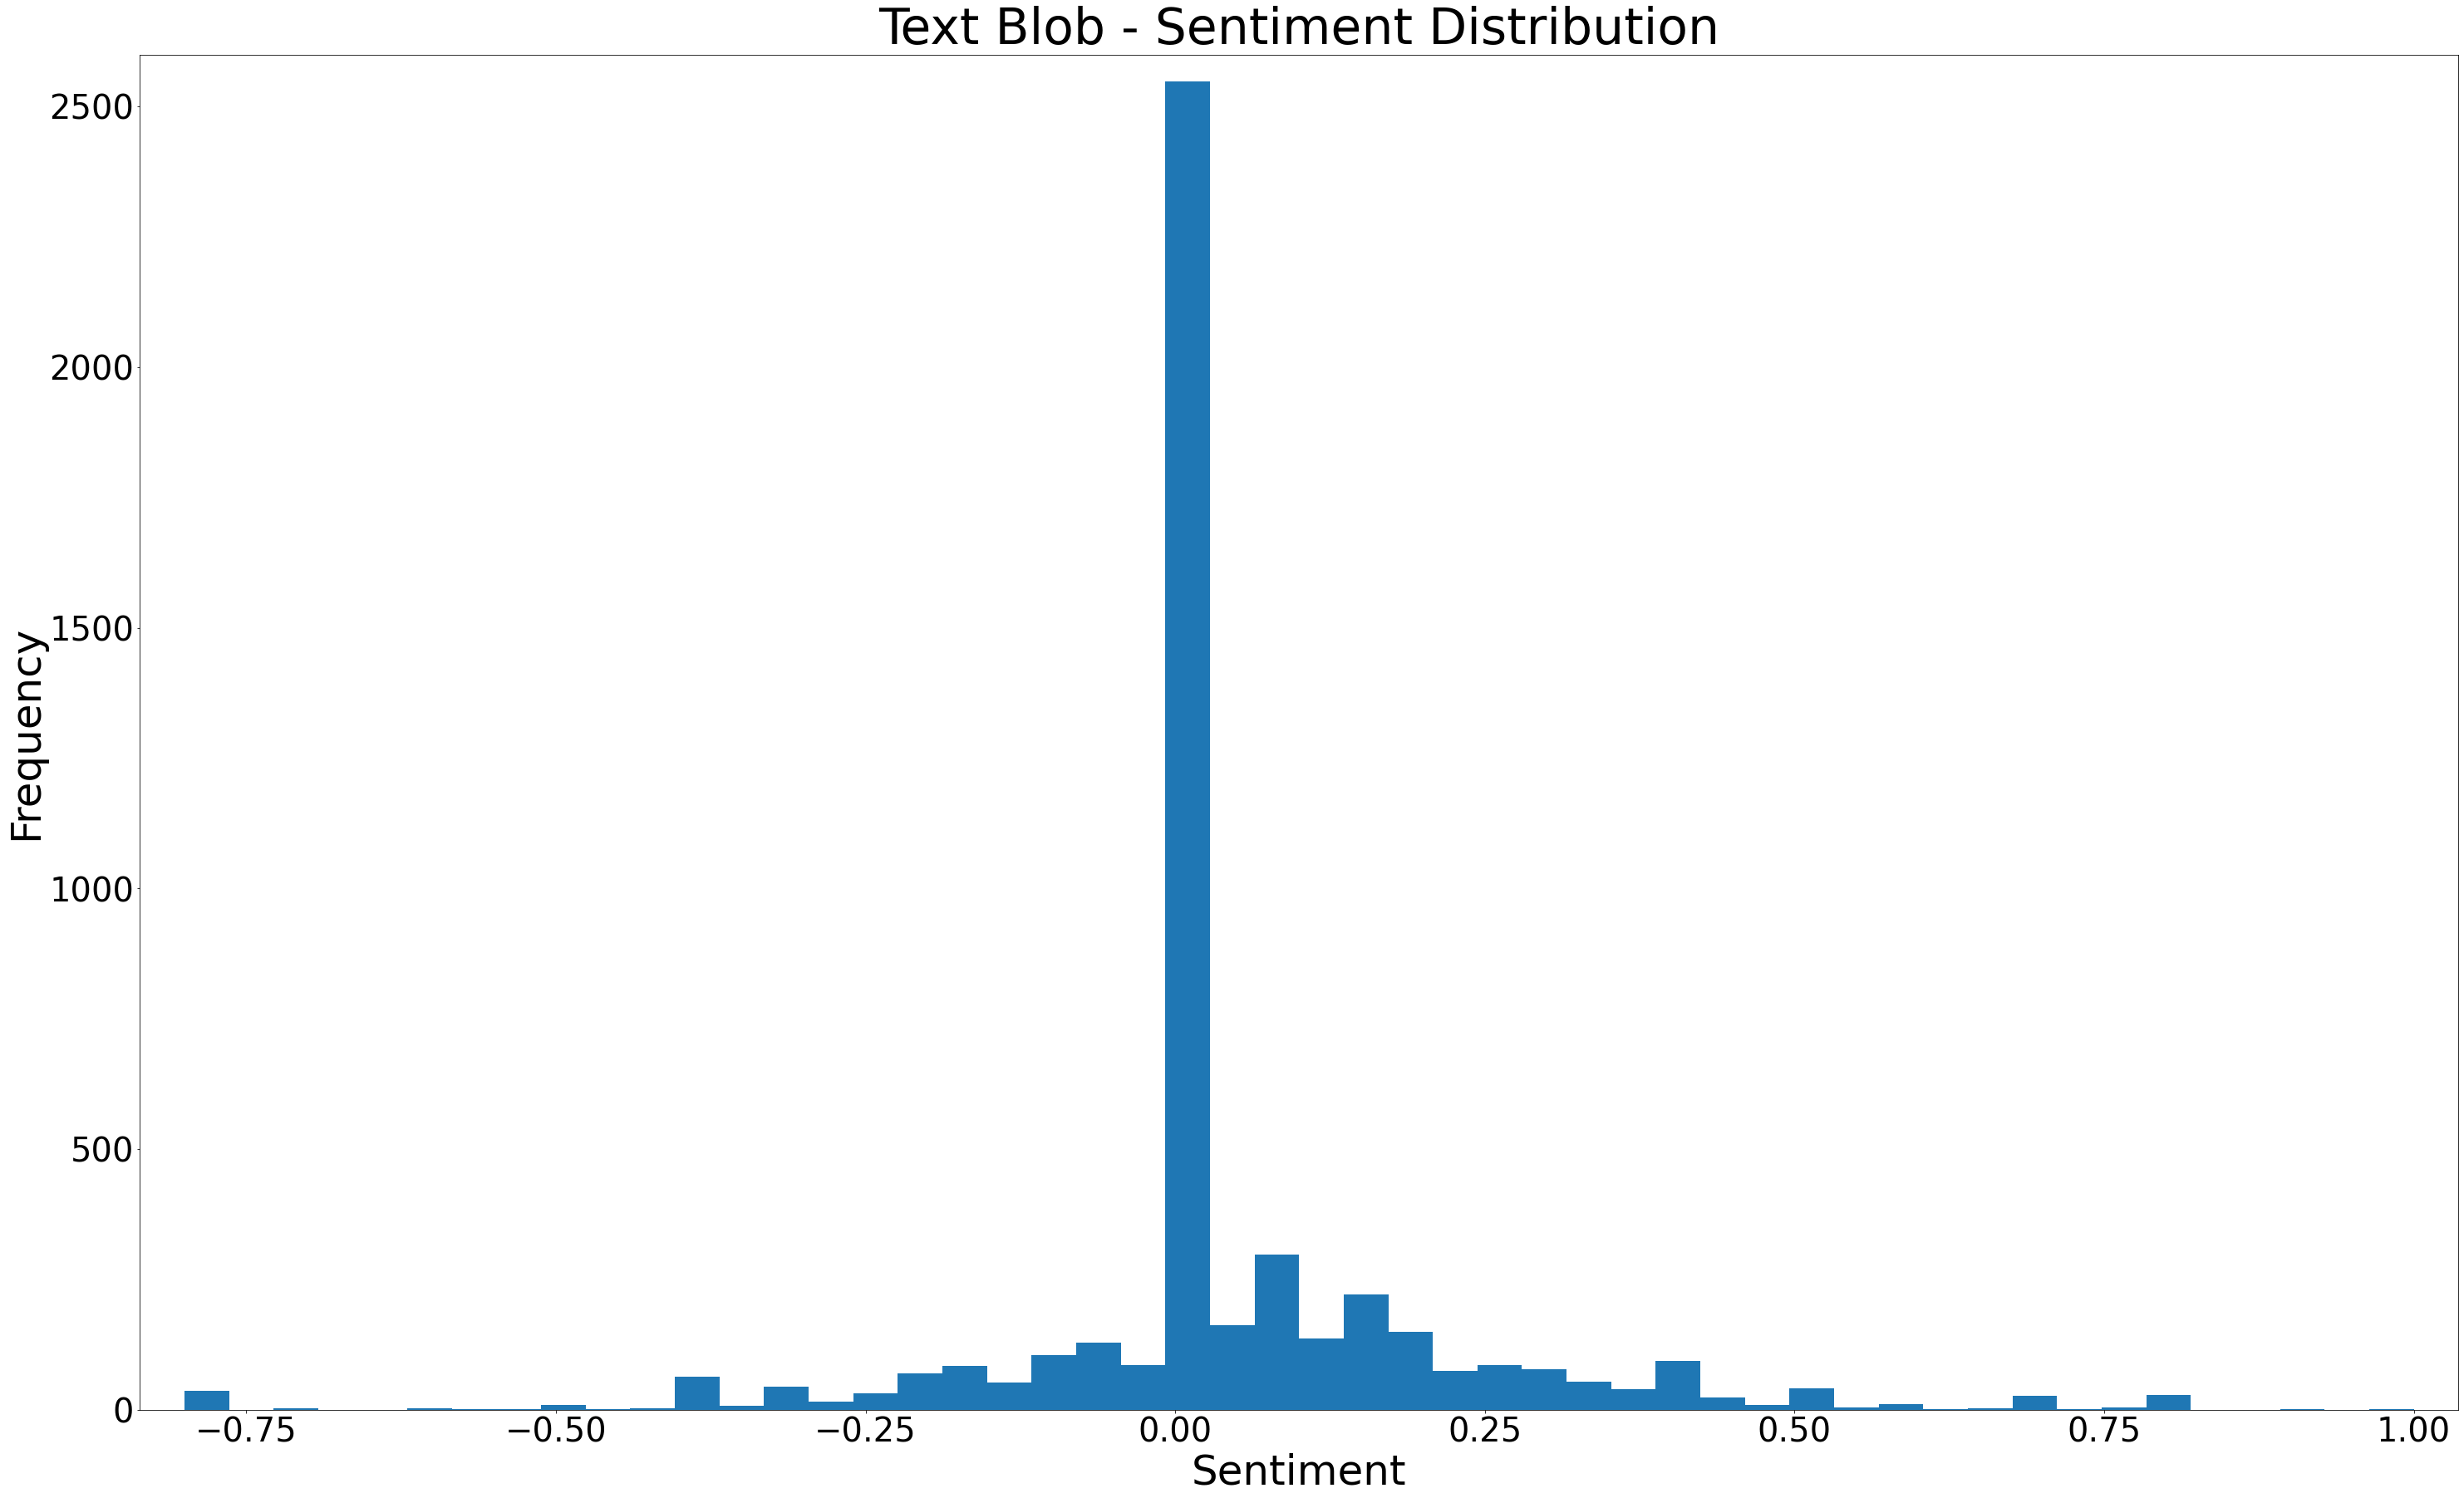

In [17]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Text Blob - Sentiment Distribution', fontsize=60)
plt.show()

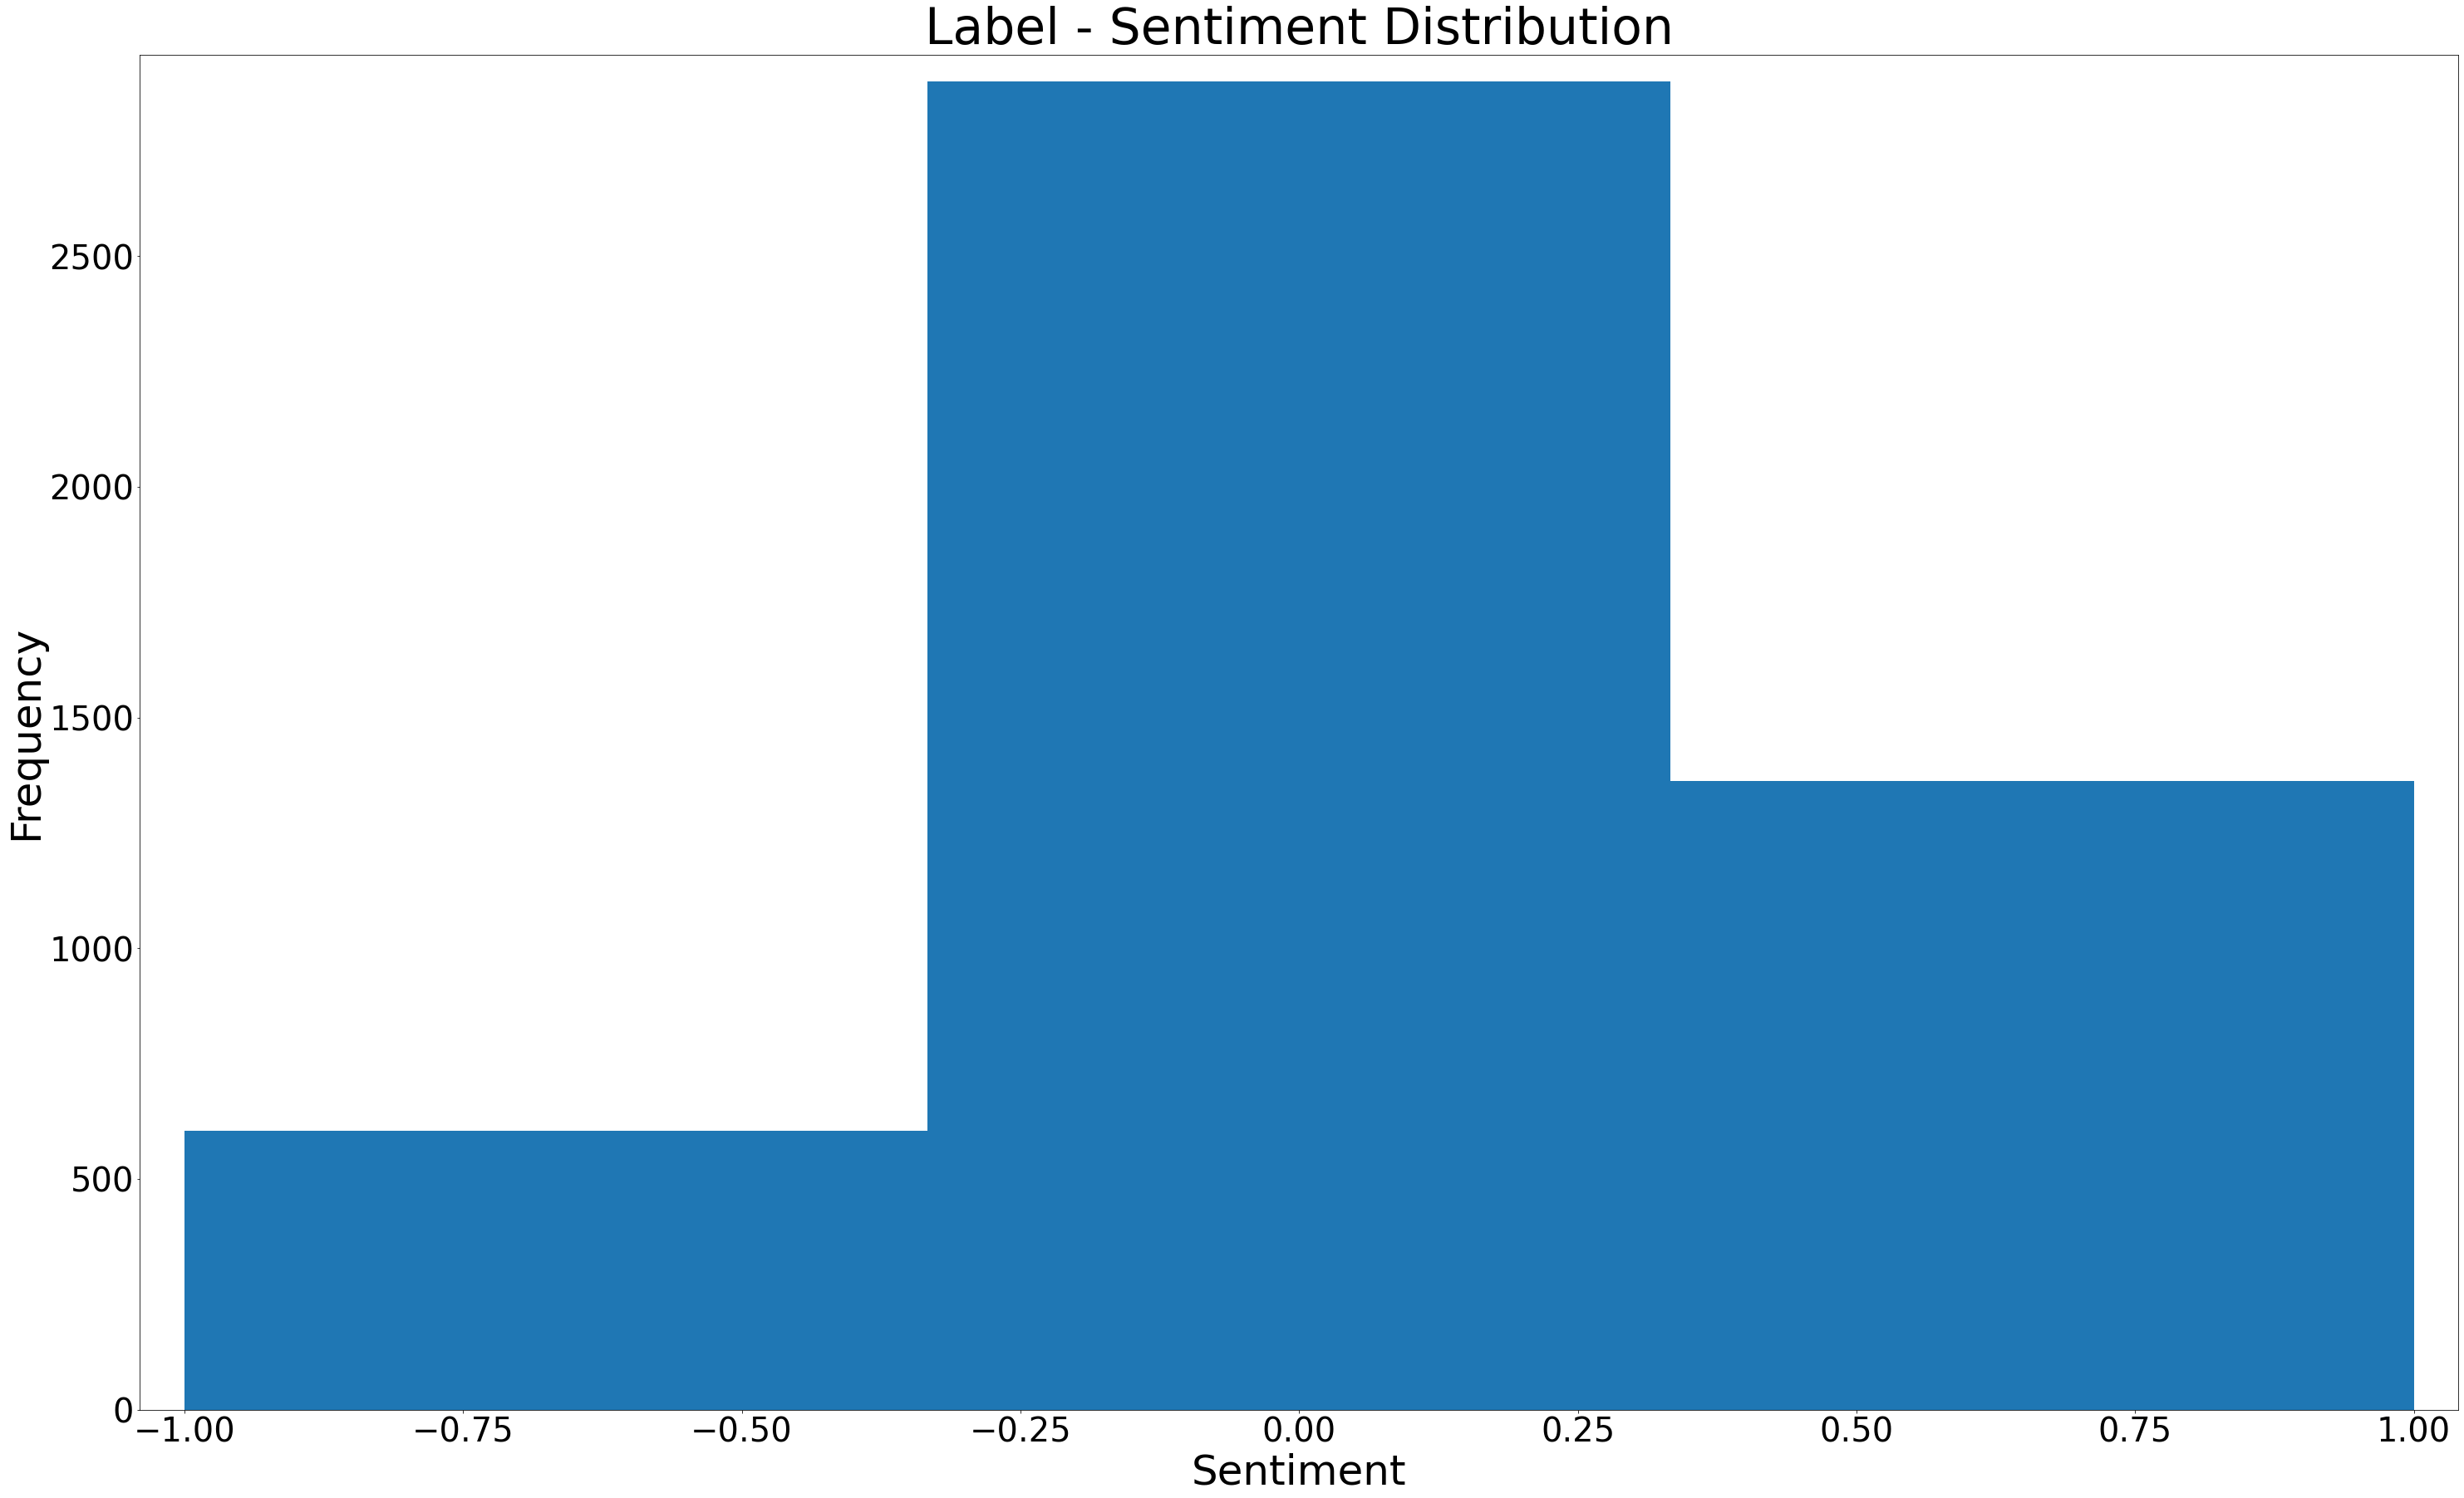

In [18]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['labels'], bins=3)
plt.title('Label - Sentiment Distribution', fontsize=60)
plt.show()

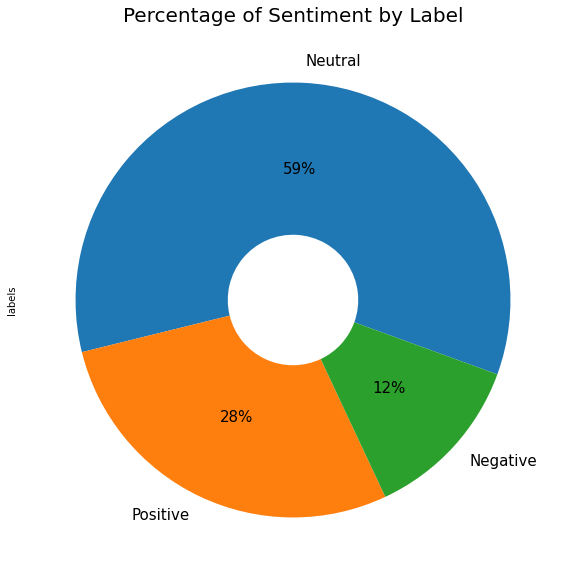

In [22]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Sentiment by Label', fontsize=20)
df.labels.value_counts().plot(kind='pie', labels = ['Neutral', 'Positive', 'Negative'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})
plt.show()

In [23]:
#### 
df['word_count'] = df['messages'].apply(lambda x: len(str(x).split()))
df['title_len'] = df['lemm_text'].astype(str).apply(len)

In [25]:
df.head(2)

,labels,messages,lemm_text,sentiment,word_count,title_len
0,0,"[accord, gran, company, no, plan, move, production, russia, although, company, grow]","accord, gran, company, no, plan, move, production, russia, although, company, grow",0.000000,21,82
1,0,"[technopoli, plan, develop, stage, area, no, less, square, meter, order, host, compan...","technopoli, plan, develop, stage, area, no, less, square, meter, order, host, company, work, com...",0.083333,33,129
